# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Lecture 6: Time-stepping methods (numerical solution of IVPs) 2 <a class="tocSkip">
    
### Homework Exercises <a class="tocSkip">

**WARNING**

Note that some of the cells below take quite a few minutes to run since we consider multiple methods and multiple time step sizes in some of the convergence comparison tests. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---SciPy-methods-comparison" data-toc-modified-id="Homework---SciPy-methods-comparison-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - SciPy methods comparison</a></span></li><li><span><a href="#Homework---The-van-der-Pol-problem" data-toc-modified-id="Homework---The-van-der-Pol-problem-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - The van der Pol problem</a></span></li><li><span><a href="#Homework---L-stability" data-toc-modified-id="Homework---L-stability-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - L-stability</a></span></li><li><span><a href="#Homework---Implementing-Runge-Kutta-4-stage-method-(RK4)" data-toc-modified-id="Homework---Implementing-Runge-Kutta-4-stage-method-(RK4)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Implementing Runge-Kutta 4 stage method (RK4)</a></span></li><li><span><a href="#Homework---Implementing-Adams-Bashforth-4-step-method-(AB4)-[$\star$]" data-toc-modified-id="Homework---Implementing-Adams-Bashforth-4-step-method-(AB4)-[$\star$]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Implementing Adams-Bashforth 4-step method (AB4) [$\star$]</a></span></li><li><span><a href="#Homework---ODE-solver-timings-(non-stiff-problems)-[$\star$]" data-toc-modified-id="Homework---ODE-solver-timings-(non-stiff-problems)-[$\star$]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - ODE solver timings (non-stiff problems) [$\star$]</a></span></li><li><span><a href="#Homework---ODE-solver-timings-(stiff-problems)-[$\star$]" data-toc-modified-id="Homework---ODE-solver-timings-(stiff-problems)-[$\star$]-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - ODE solver timings (stiff problems) [$\star$]</a></span></li></ul></li></ul></div>

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

from matplotlib import rcParams
# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - SciPy methods comparison

Consider the ODE

$$ y' = y - t^2 +1, \;\;\;\;\; y(0) = \frac{1}{2},$$

with exact solution

$$ y(t) = (t + 1)^2 - \frac{e^{t}}{2}. $$

Read the docs for some of the SciPy ODE solvers, e.g. [`scipy.integrate.odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) and [`scipy.integrate.solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).

Use a range of methods to integrate this problem from $t=0$ to $t=4$, vary the rtol and atol error tolerance parameters (for simplicity just set them equal to the same value for each experiment) and plot the error for each of the methods at the end of the simulation period against the tolerance value.

Note that when you plot an error tolerance on the $x$ axis of a plot you can't really say which method is best - really you should plot the time to solution on the $x$ axis - you could try this here, later questions in this homework ask you to do this.

In [91]:
def f(y, t):
    return y-t**2+1

rtol=1
atol=1

t = np.linspace(0,4,100)
y0 = np.array(0.5).reshape(1,)
y_ode = odeint(f, y0, t, rtol=rtol, atol=atol).reshape(-1)
y_exact = (t+1)**2 - 0.5*np.exp(t)


def f(t, y):
    return y-t**2+1

y_ivp = solve_ivp(f, [0,4], y0, max_step=0.05, rtol=rtol, atol=atol)

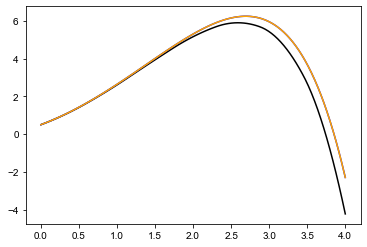

In [92]:
plt.plot(t,y_ode, 'black')
plt.plot(t, y_exact, 'blue')
plt.plot(y_ivp.t, y_ivp.y.reshape(-1), 'orange')

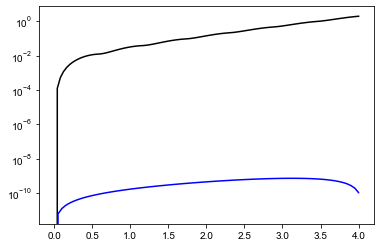

In [93]:
error_ode = np.abs(y_exact - y_ode)
y_exact1 = (y_ivp.t+1)**2 - 0.5*np.exp(y_ivp.t)
error_ivp = np.abs(y_exact1 - y_ivp.y.reshape(-1))

plt.semilogy(t, error_ode, 'black')
plt.semilogy(y_ivp.t, error_ivp, 'blue')

## Homework - The van der Pol problem

Consider now the van der Pol oscillator problem which can be used to model electrical circuits.


For background see:

<https://en.wikipedia.org/wiki/Van_der_Pol_oscillator>

<http://mathworld.wolfram.com/vanderPolEquation.html>

<https://archimede.dm.uniba.it/~testset/problems/vdpol.php>


This second-order problem can be written as the first-order system

$$ y_1' = y_2, \;\;\;\; y_2' = \mu (1 - y_1^2)y_2 - y_1,$$

where $\mu$ is a parameter we can vary to change the characteristics of the problem. Start with a value of $\mu = 100$, and you could then try making this smaller/larger (but be careful about making it much larger as the problem becomes stiff and our solvers not designed to handle stiff problems start taking a very long time to complete! Refer to the final questions which consider errors vs CPU times for non-stiff and then stiff problem).

Consider a case with initial condition $y_1 = 2$ and $y_2=0$, and integrate up to time $t=2\mu$.

Repeat the error vs tolerance analysis from the previous question.

To compute the error use a Radau solver with a very tight tolerance as the "true" solution.

In [182]:
def f(t, u):
    state = np.zeros_like(u)
    state[0] = u[1]
    state[1] = mu*(1.-u[0]**2.)*u[1] - u[0]
    
    return state

mu = 1.e2
N = 101
tol = 1e-8
t0 = 0.
tend = 2*mu
ts = np.linspace(t0, tend, N)
r_tol = a_tol = tol
y0 = np.array([2,0])
y_solve_ivp_radau = solve_ivp(f, [t0, tend], y0, method='Radau', t_eval=ts, rtol=r_tol, atol=a_tol)

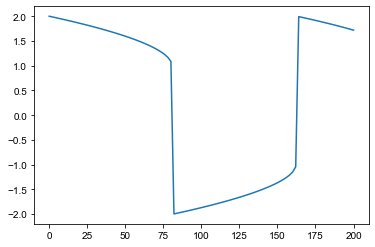

In [187]:
plt.plot(y_solve_ivp_radau.t, y_solve_ivp_radau.y[0])

## Homework - L-stability

From the lecture (the discussion on L-stability), consider the problem

$$y'(t) = \lambda(y - \cos(t)) - \sin(t), \;\;\;\; y(0) = y_0.$$

The exact solution to this problem is 

$$y(t) = \text{e}^{\lambda t}(y_0 - 1) + \cos(t).$$

Write some code that time steps this problem with the initial condition $y_0=1.5$ using both the backward Euler and the trapezoidal schemes. 

Note that since this is a scalar linear problem, we can just rearrange our implicit schemes for this problem to arrive at updates of the form `y[n+1] = ...` where the RHS of the expression contains things we know, meaning you do not have to call a nonlinear solver.

Try to choose values of $\lambda$ the give the behaviour for the two schemes as presented in the image in the L-stability section of the lecture.

Verify the claims we made in the lecture: "Note that reducing the time step does not help. But this problem with the trapezoidal scheme does not manifest if we start with the initial condition $y_0=1$."

In [138]:
def backward(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    u_star = 0
    
    while t < t_max:
        u_star = u + dt * f(t, u)
        u = (u + dt * (-numda*np.cos(t+dt)-np.sin(t+dt)))/(1.-dt*numda)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
        
    return np.array(u_all), np.array(t_all)

def trapezoidal(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    u_star = 0
    
    while t < t_max:
        u_star = u + dt * f(t, u)
        u = (u + 0.5 * dt * f(t, u) + 0.5*dt*(-numda*np.cos(t+dt)-np.sin(t+dt))) / (1.-0.5*numda*dt)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
        
    return np.array(u_all), np.array(t_all)

def f(t, y):
    return numda*(y-np.cos(t))-np.sin(t)

def exact(t):
    return np.exp(numda*t)*(y0-1.)+np.cos(t)

y0 = 1.5
t0 = 0.
t_max = 2.
dt = 0.01
numda = -1.e6

# def f(t, C):
#     return -K*C
# def exact(t):
#     # this function evaluates the exact solution to the problem
#     return C0*np.exp(-K*t)
# K = 2
# C0 = 1
# y0 = 1
# dt = 0.2
# t_max = 1
y_back, t_back = backward(f, y0, t0, t_max, dt)
y_trape, t_trape = trapezoidal(f, y0, t0, t_max, dt)
y_exact = exact(t_back)

error_back = np.abs(y_back - y_exact)
error_trape = np.abs(y_trape - y_exact)

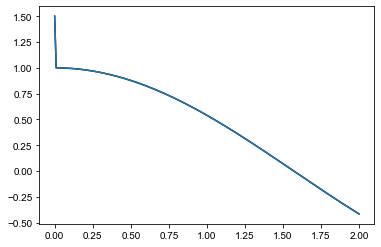

In [139]:
plt.plot(t_back, y_back, 'black')
plt.plot(t_back,y_exact)

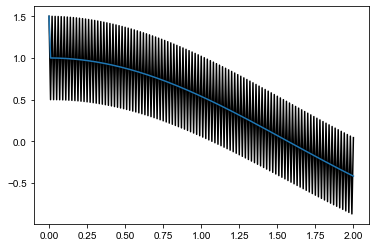

In [141]:
plt.plot(t_back, y_trape,'black')
plt.plot(t_back,y_exact)

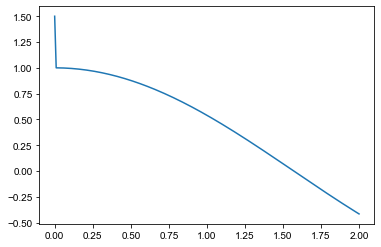

In [142]:
plt.plot(t_back,y_exact)

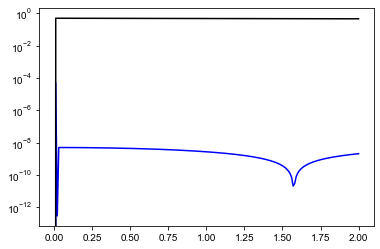

In [143]:
plt.semilogy(t_back,error_back, 'blue')
plt.semilogy(t_back,error_trape, 'black')

## Homework - Implementing Runge-Kutta 4 stage method (RK4)

Write a general Python function that implements the classical RK4 method for a given RHS function, and apply it to the problem we used previously to compare the errors between forward Euler and improved Euler (recalling that we can interpret IE as a predictor-corrector LMS pair, or as a Runge-Kutta method RK2($\alpha=1$)):

$$u'(t)=u,\;\;\; u(0)=1,$$

and where we evaluate the error at the time $t = 2\pi$.

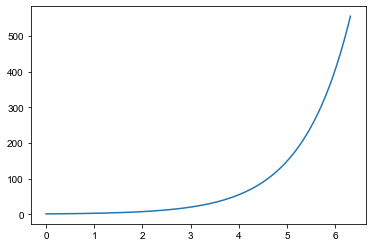

In [167]:
def RK4(f, u0, t0, t_max, dt, A):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    
    while t < t_max:
        k1 = f(t,u)
        k2 = f(t+A[1,0]*dt, u+dt*A[1,1]*k1)
        k3 = f(t+A[2,0]*dt, u+dt*(A[2,1]*k1 + A[2,2]*k2))
        k4 = f(t+A[3,0]*dt, u+dt*(A[3,1]*k1 + A[3,2]*k2 + A[3,3]*k3))
        u = u + A[4,1:] @ (dt*np.array([k1,k2,k3,k4]))
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    
    return np.array(u_all), np.array(t_all)

A = np.array([[0,0,0,0,0],
             [.5,.5,0,0,0],
             [.5,0,.5,0,0],
             [1,0,0,1,0],
             [0,1/6,1/3,1/3,1/6]],dtype=float)
def f(t, u):
    val = u
    return val

u0 = 1.
t0 = 0.
t_max = 2*np.pi
dt = 0.04

U, T = RK4(f, u0, t0, t_max, dt, A)
plt.plot(T, U)

## Homework - Implementing Adams-Bashforth 4-step method (AB4) [$\star$]

In the lecture we derived AB2 by choosing our free parameters ($\beta_0\,$ and $\,\beta_1$) such that we could integrate exactly the monomials $f(t) = 1$ and $f(t)=t$. This led to two simultaneous equations we could trivially solve.

Try extending this to the case of AB4 - now we have four free parameters ($\beta_0, \ldots, \beta_3$) and we need to integrate polynomials up to degree 3 exactly.

Derive the corresponding system of 4 equations for 4 unknowns.

**[Hint**: your life will be easier when computing the integrals if you consider a polynomial basis of the form $P_{N+1}(t) = t (t + \Delta t) \dots (t + N\Delta t)$

(note that this is consistent with what we did for AB2, but now we aren't using monomials any more for $N>1$, i.e. additionally consider the cases $f(t)=t(t+\Delta t)$ and $f(t)=t(t+\Delta t)(t+2\Delta t)$).


Can you see where this hint came from - why is this a convenient choice, if again as per the AB2 derivation in the lecture we assume $t_{n+1} = \Delta t,\; t_n = 0$, $t_{n-1} = -\Delta t$, $t_{n-2} = -2\Delta t$, ...?


Write a script which forms and solves the resulting linear system for the AB coefficients, for $k=4$.

Check your coefficients agree with those given in the lecture, e.g. with something like

```python
AB4_beta = np.linalg.solve(LHS_A, RHS_b)  
print('Our calculated AB4 coefficients: ',AB4_beta)
print('Our coefficient agree with what we wrote in the lecture: ',np.allclose(AB4_beta, np.array([ 55./24., -59./24., 37./24., -9./24.])))
```
**]**


and then implement and verify the method following the implementation and convergence approach taken in the homework exercise from the previous lecture (`Homework: Improved Euler and accuracy comparison with forward Euler`).

As the scheme isn't self-starting use the appropriate number of time steps from an appropriate order RK method to start things off.

In [151]:
def AB4(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0] 
    
    for n in range(3):
        k1 = dt*f(t, u)
        k2 = dt*f(t + 0.5*dt, u + 0.5*k1)
        k3 = dt*f(t + 0.5*dt, u + 0.5*k2)
        k4 = dt*f(t + dt, u + k3)
        u = u + (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    
    AB4_beta = np.array([ 55./24., -59./24., 37./24., -9./24.])
    
    while t < t_max:
        u = u + dt * (AB4_beta[0]*f(t, u_all[-1]) + AB4_beta[1]*f(t-dt, u_all[-2]) 
                    + AB4_beta[2]*f(t-2*dt, u_all[-3]) + AB4_beta[3]*f(t-3*dt, u_all[-4]))
        u_all.append(u)
        t = t + dt
        t_all.append(t)
        
    return np.array(u_all), np.array(t_all)

# problem parameters
dt = 0.04
u0 = 1.0
t0 = 0.0
tf = 2*np.pi

def approx_error(dt, t_max):
    uall, tall = AB4(f, u0, t0, t_max, dt)
    err3 = abs(uall[-1]-np.exp(t_max))
    return err1, err2, err3

def f(t, u):
    
    val = u
    
    return val

q, t = AB4(f, u0, t0, tf, dt)

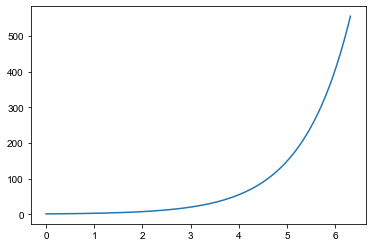

In [153]:
plt.plot(t, q)

## Homework - ODE solver timings (non-stiff problems) [$\star$]

In an earlier homework question we compared a variety of SciPy's ODE solver methods on the problem

$$ y' = y - t^2 +1, \;\;\;\;\; y(0) = \frac{1}{2},$$

which has the exact solution

$$ y(t) = (t + 1)^2 - \frac{e^{t}}{2}. $$

We integrated from $t=0$ and evaluating the error at $t=4$.

We varied the rtol and atol error tolerance parameters to generate plots of the 'error' vs the 'user-specified error tolerance'.

This was interesting but of far more value would be an analysis of errors vs run times.

Extend the homework exercise by recording solution timings (e.g. look back at Lecture 3's use of `%timeit` to provide estimates of run times.)

What do you observe from these results, and the differences observed between the 'error' vs 'tolerance' and 'error' vs 'run time' plots?

Finally, see how our own implementations of improved Euler (IE), AM3, and RK4 compare. What conclusions can you draw from this comparison? 

## Homework - ODE solver timings (stiff problems) [$\star$]

Consider now a vector problem demonstrating stiff behaviour.

Recall from the lecture the problem of the form

$$ y'' - (\mu + 1) y' + \mu y = 0 , $$

or equivalently

$$ \boldsymbol{z}'=A\boldsymbol{z}\;\;\;\text{where}
\;\;\;\; \boldsymbol{z} = 
\begin{bmatrix}
y\\
y'
\end{bmatrix}
\;\;\;\text{and}
\;\;\;\; 
A =
\begin{bmatrix}
0 & 1\\
-\mu & -(\mu + 1)
\end{bmatrix},$$

with parameter $\mu$.

The general solution to this problem is given by

$$ y(t) = C_1 \text{e}^{-\lambda_1 t} + C_2 \text{e}^{-\lambda_2 t}, $$

where $\lambda_1$ and $\lambda_2$ are the eigenvalues of the matrix $A$, and with the constants $C_1$ and $C_2$ defined by the initial conditions specified for $y$ and $y'$.

What are the eigenvalues for this problem in terms of $\mu$?

Choose values of $\mu$ that lead to a problems that can be characterised as stiff and non stiff.

Perform the same analysis of error vs run times as in the previous question, but focus on SciPy's `solve_ivp` with the  `RK23`, `RK45`, `BDF` and `Radau` options.

I suggest you use an initial condition of $y(0)=1$ and $y'(0) = \mu - 2$ and integrate up to a time of $t=1$.

Comment on what you observe, and if (and how) your advice on the best performing approach changes as you change the stiffness of the problem.